**<h1>Tugas Besar Pengantar Bioinformatika<br>H071171011 / Eka Kurnia</h1>**

<h2>1. Eksplorasi Data</h2>

Dataset adalah Mice Protein Expression Data Set, yang diperoleh dari UCI Machine Learning Repository.<br>Link akses : https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression


Saya akan menggunakan dataset yang disimpan dalam google drive. Sehingga saya perlu menghubungkan google drive dengan google colab.

In [46]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dataset = "drive/My Drive/DatasetFinBio/Data_Cortex_Nuclear.xls"

In [0]:
import numpy as np 
import pandas as pd 

Membaca dataset dari drive, kita bisa gunakan beberapa fungsi dalam library pandas yang berguna untuk membaca dataset, sesuai dengan formatnya masing-masing, misalnya fungsi *read_csv()*, untuk membaca data berformat csv, fungsi *read_excel()* untuk membaca data berformat excel, dan lain-lain. Setelah di import kemudian disimpan dalam variabel df, kita bisa melihat 5 baris data teratas dengan menggunakan fungsi head dari DataFrame.

In [49]:
df = pd.read_excel(dataset)
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pERK_N,pJNK_N,PKCA_N,pMEK_N,pNR1_N,pNR2A_N,pNR2B_N,pPKCAB_N,pRSK_N,AKT_N,BRAF_N,CAMKII_N,CREB_N,ELK_N,ERK_N,GSK3B_N,JNK_N,MEK_N,TRKA_N,RSK_N,APP_N,Bcatenin_N,SOD1_N,MTOR_N,P38_N,pMTOR_N,DSCR1_N,AMPKA_N,NR2B_N,...,TIAM1_N,pP70S6_N,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,BAX_N,ARC_N,ERBB4_N,nNOS_N,Tau_N,GFAP_N,GluR3_N,GluR4_N,IL1B_N,P3525_N,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.687906,0.306382,0.402698,0.296927,1.022060,0.605673,1.877684,2.308745,0.441599,0.859366,0.416289,0.369608,0.178944,1.866358,3.685247,1.537227,0.264526,0.319677,0.813866,0.165846,0.453910,3.037621,0.369510,0.458539,0.335336,0.825192,0.576916,0.448099,0.586271,...,0.482864,0.294170,0.182150,0.842725,0.192608,1.443091,0.294700,0.354605,1.339070,0.170119,0.159102,0.188852,0.106305,0.144989,0.176668,0.125190,0.115291,0.228043,0.142756,0.430957,0.247538,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.695006,0.299051,0.385987,0.281319,0.956676,0.587559,1.725774,2.043037,0.445222,0.834659,0.400364,0.356178,0.173680,1.761047,3.485287,1.509249,0.255727,0.304419,0.780504,0.157194,0.430940,2.921882,0.342279,0.423560,0.324835,0.761718,0.545097,0.420876,0.545097,...,0.454519,0.276431,0.182086,0.847615,0.194815,1.439460,0.294060,0.354548,1.306323,0.171427,0.158129,0.184570,0.106592,0.150471,0.178309,0.134275,0.118235,0.238073,0.142037,0.457156,0.257632,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.677348,0.291276,0.381002,0.281710,1.003635,0.602449,1.731873,2.017984,0.467668,0.814329,0.399847,0.368089,0.173905,1.765544,3.571456,1.501244,0.259614,0.311747,0.785154,0.160895,0.423187,2.944136,0.343696,0.425005,0.324852,0.757031,0.543620,0.404630,0.552994,...,0.447197,0.256648,0.184388,0.856166,0.200737,1.524364,0.301881,0.386087,1.279600,0.185456,0.148696,0.190532,0.108303,0.145330,0.176213,0.132560,0.117760,0.244817,0.142445,0.510472,0.255343,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.583277,0.296729,0.377087,0.313832,0.875390,0.520293,1.566852,2.132754,0.477671,0.727705,0.385639,0.362970,0.179449,1.286277,2.970137,1.419710,0.259536,0.279218,0.734492,0.162210,0.410615,2.500204,0.344509,0.429211,0.330121,0.746980,0.546763,0.386860,0.547849,...,0.442650,0.398534,0.161768,0.760234,0.184169,1.612382,0.296382,0.290680,1.198765,0.159799,0.166112,0.185323,0.103184,0.140656,0.163804,0.123210,0.117439,0.234947,0.145068,0.430996,0.251103,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.550960,0.286961,0.363502,0.277964,0.864912,0.507990,1.480059,2.013697,0.483416,0.687794,0.367531,0.355311,0.174836,1.324695,2.896334,1.359876,0.250705,0.273667,0.702699,0.154827,0.398550,2.456560,0.329126,0.408755,0.313415,0.691956,0.536860,0.360816,0.512824,...,0.419095,0.393447,0.160200,0.768113,0.185718,1.645807,0.296829,0.309345,1.206995,0.164650,0.160687,0.188221,0.104784,0.141983,0.167710,0.136838,0.116048,0.255528,0.140871,0.48

In [50]:
df.shape

(1080, 82)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

<h2>2. Preprocessing</h2>

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import preprocessing

Mengubah data kategorik menjadi numerik berdasarkan levelnya dengan menggunakan fungsi factorize()

In [0]:
df['Genotype'] = pd.factorize(df['Genotype'])[0]
df['Treatment'] = pd.factorize(df['Treatment'])[0]
df['Behavior'] = pd.factorize(df['Behavior'])[0]

Karena atribut MouseID tidak diperlukan dalam processing, maka atribut ini bisa di buang dengan menggunakan fungsi drop() dari DataFrame.

In [0]:
df = df.drop(['MouseID'], axis = 1)

<h3>Mengisi missing value (NA)</h3>


Fungsi isnull() untuk mengecek apakah suatu data itu adalah NA atau bukan. Kemudian gunakan fungsi sum() untuk menghitung jumlahnya.

In [55]:
df.isnull().sum()

DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
NR2A_N       3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

In [56]:
df.isnull().sum().sum()

1396

Jumlah missing value 1396 relatif kecil jika dibandingkan dengan jumlah total data sebanyak 1080x80. Sehingga kita dapat mengisi missing value dengan nilai mean dari tiap attribut.

In [57]:
mean = df.mean()
df.fillna(mean, inplace=True)

print(df.isnull().sum())
print(df.isnull().sum().sum())

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64
0


In [58]:
df.isnull().sum().sum()

0

<h3>Filtering menggunakan Univariate Feature Selection (UFS)</h3>

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Bagi dua data x dan y sebagai atribut prediktor dan kelas

In [0]:
X = df.drop(['class'], axis = 1)
y = df['class']

Kita ingin mengambil 80% dari total fitur yang ada, dengan asumsi 80% fitur sudah mewakili 20% fitur yang lainnya. Python menyediakan library untuk menyeleksi fitur dari suatu data dengan menghitung score-nya, yaitu *SelectKBest()*.
Inisial awal, saya asumsikan 10 fitur terbaik sudah mewakili sebanyak 80%. Maka kita tetapkan nilai k=10.

In [0]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(abs(X),y)

#fit.scores_ adalah array yang berisi skor dari tiap-tiap atribut
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

Cetak urutan fitur terbaik menggunakan fungsi nlargest() yang mengurutkan data dari terbesar ke terkecil. Parameternya adalah batas jumlah data fitur, dan parameter urutan skor data fitur. Disini saya hanya batasi sampai 10 data fitur.

In [62]:
featureScores.nlargest(10,'Score')

,Features,Score
77,Genotype,570.000000
78,Treatment,570.000000
79,Behavior,525.000000
7,pCAMKII_N,167.355452
32,SOD1_N,102.482845
10,pERK_N,84.226671
17,pPKCAB_N,63.175296
46,pPKCG_N,52.751784
76,CaNA_N,49.595635
0,DYRK1A_N,45.361772


In [63]:
total_score = featureScores.nlargest(len(X),'Score')['Score'].sum()
total_score

2618.398033211657

Total skor sebanyak kurang lebih 2618,4. Jika kita hanya ingin 80% dari jumlah fitur dari data, dengan asumsi bahwa data fitur 80% itu sudah mewakili 20% yang lainnya maka kita hanya akan mengambil total skor fitur sebanyak kurang lebih 2094,7 (80% dari 2618,4). Dengan mengambil 7 fitur terbaik, maka itu sudah mewakili hampir 80% dari total fitur data.

In [64]:
seven_best_score = featureScores.nlargest(7,'Score')['Score'].sum()
seven_best_score

2082.24026474764

In [65]:
seven_best_score/total_score*100

79.52344289663324

Selanjutnya kita simpan 7 kolom tersebut yang diseleksi ke dalam variabel selected_columns. Untuk itu, kita butuh nilai batas skor yang menjadi penentu apakah fitur tersebut terpilih atau tidak, yaitu nilai skor terkecil dari 7 fitur terbaik, kita beri nama smallest_score. Maka kita seleksi fitur yang memiliki skor lebih besar atau sama dengan nilai smallest_score akan terpilih.

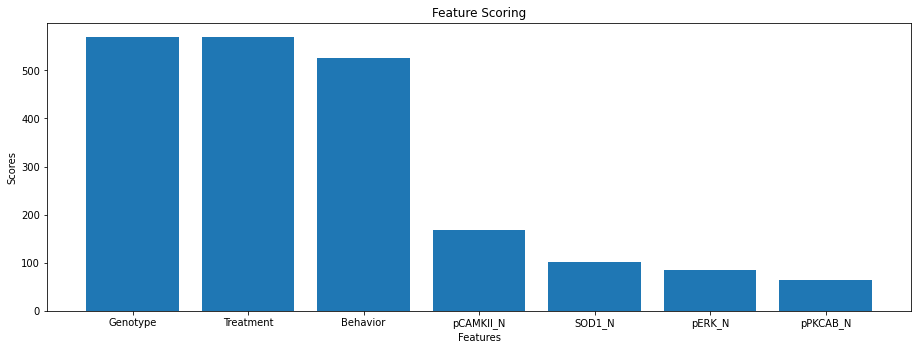

In [66]:
smallest_score = featureScores.nlargest(10,'Score').iloc[7,1]
selected_columns = featureScores[(featureScores['Score'] >= smallest_score)]['Features']

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
xs = featureScores.nlargest(7,'Score')['Features']
ys = featureScores.nlargest(7,'Score')['Score']
ax.bar(xs, ys)
ax.set_title('Feature Scoring')
ax.set_xlabel('Features')
ax.set_ylabel('Scores')
plt.show()

In [0]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
X_new = bestfeatures.fit_transform(abs(X),y)
X_new = pd.DataFrame(X_new, columns=selected_columns)

#bangun data baru dengan mengonkat X_new dengan y
df_new = pd.concat([X_new, y], axis=1)

Hasil dari 7 urutan fitur terbaik diatas selanjutnya kita terapkan ke X baru yang kita beri nama X_new lalu buat dalam bentuk DataFrame agar data ini mudah untuk diolah.

Diperoleh data baru setelah dilakukan seleksi fitur UFS

In [68]:
df_new

,pCAMKII_N,pERK_N,pPKCAB_N,SOD1_N,pPKCG_N,Genotype,Treatment,Behavior,class
0,2.373744,0.687906,2.308745,0.369510,1.443091,0.0,0.0,0.0,c-CS-m
1,2.292150,0.695006,2.043037,0.342279,1.439460,0.0,0.0,0.0,c-CS-m
2,2.283337,0.677348,2.017984,0.343696,1.524364,0.0,0.0,0.0,c-CS-m
3,2.152301,0.583277,2.132754,0.344509,1.612382,0.0,0.0,0.0,c-CS-m
4,2.134014,0.550960,2.013697,0.329126,1.645807,0.0,0.0,0.0,c-CS-m
...,...,...,...,...,...,...,...,...,...
1075,2.483740,0.265642,1.241958,0.820078,2.630825,1.0,1.0,1.0,t-SC-s
1076,2.512737,0.270378,1.361354,0.854258,2.593227,1.0,1.0,1.0,t-SC-s
1077,1.989723,0.255045,1.065022,0.661809,2.628286,1.0,1.0,1.0,t-SC-s
1078,2.086028,0.230649,1.115030,0.698413,2.659706,1.0,1.0,1.0,t-SC-s


<h3>Normalisasi Data</h3>

Dalam melakukan normalisasi, kita akan mengubah skala nilai dari tiap atribut numerik menjadi antara 0 sampai 1. Dari data X, kita ketahui bahwa pada atribut indeks-5 sampai indeks-8 telah normal. Yang akan kita normalisir adalah atribut indeks-0 sampai indeks-4. Maka kita inisialisasikan sebuah variabel X_abnormal yang berisi data X atribut indeks-0 sampai indeks-4 yang akan kita normalisasi.

In [69]:
from sklearn.preprocessing import normalize

X_abnormal = X_new.iloc[:,0:5]
normalized_X = normalize(X_abnormal)

#Karena normalized_X hanya berisi data pada atribut indeks-0 sampai indeks-4
#Dibuat DataFrame untuk mengonkatnya dengan data X atribut indeks yang lain
normalized_X = pd.DataFrame(normalized_X)
normalized_X = pd.concat([normalized_X, X_new.iloc[:,5:8]], axis = 1)
normalized_X.columns = X_new.columns
normalized_X

Features,pCAMKII_N,pERK_N,pPKCAB_N,SOD1_N,pPKCG_N,Genotype,Treatment,Behavior
0,0.642322,0.186144,0.624733,0.099987,0.390492,0.0,0.0,0.0
1,0.658942,0.199799,0.587327,0.098398,0.413812,0.0,0.0,0.0
2,0.654079,0.194032,0.578067,0.098454,0.436666,0.0,0.0,0.0
3,0.615201,0.166721,0.609614,0.098473,0.460874,0.0,0.0,0.0
4,0.623098,0.160872,0.587968,0.096100,0.480550,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1075,0.633414,0.067745,0.316730,0.209140,0.670925,1.0,1.0,1.0
1076,0.634262,0.068249,0.343631,0.215631,0.654580,1.0,1.0,1.0
1077,0.562684,0.072125,0.301183,0.187156,0.743267,1.0,1.0,1.0
1078,0.573947,0.063460,0.306788,0.192160,0.731788,1.0,1.0,1.0


<h2>3. Clustering</h2>
<h4>Menggunakan algoritma K-Means</h4>

In [0]:
y1 = normalized_X['Genotype']
y2 = normalized_X['Treatment']
y3 = normalized_X['Behavior']
kX = normalized_X.drop(['Genotype','Treatment','Behavior'], axis = 1)  

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [72]:
x_array = np.array(kX)

kmeans = KMeans(n_clusters = 2, random_state=123)
kmeans = kmeans.fit(x_array)
print(kmeans.cluster_centers_)

[[0.87609615 0.08619586 0.27201608 0.15530244 0.33359579]
 [0.69246599 0.1945319  0.46241157 0.09970744 0.46364336]]


In [73]:
kX["Kluster"] = kmeans.labels_
kX

Features,pCAMKII_N,pERK_N,pPKCAB_N,SOD1_N,pPKCG_N,Kluster
0,0.642322,0.186144,0.624733,0.099987,0.390492,1
1,0.658942,0.199799,0.587327,0.098398,0.413812,1
2,0.654079,0.194032,0.578067,0.098454,0.436666,1
3,0.615201,0.166721,0.609614,0.098473,0.460874,1
4,0.623098,0.160872,0.587968,0.096100,0.480550,1
...,...,...,...,...,...,...
1075,0.633414,0.067745,0.316730,0.209140,0.670925,1
1076,0.634262,0.068249,0.343631,0.215631,0.654580,1
1077,0.562684,0.072125,0.301183,0.187156,0.743267,1
1078,0.573947,0.063460,0.306788,0.192160,0.731788,1


for i =  0 , j =  1


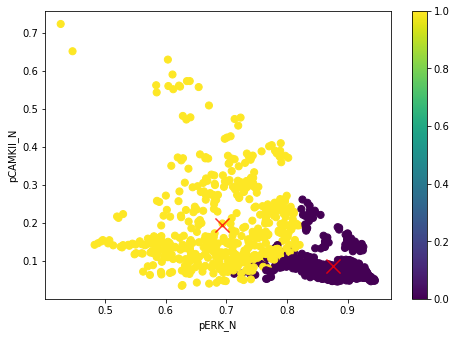

for i =  0 , j =  2


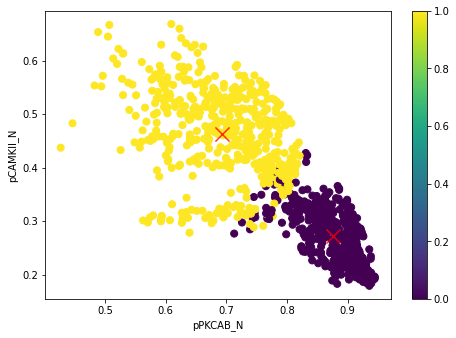

for i =  0 , j =  3


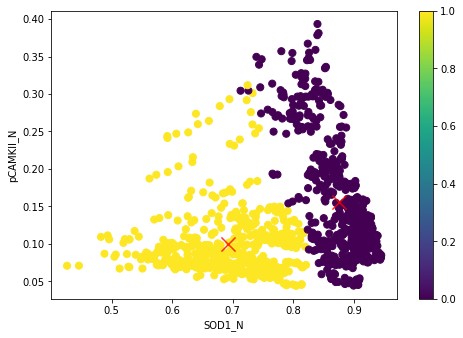

for i =  0 , j =  4


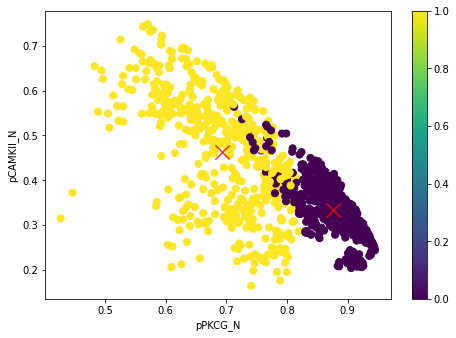

for i =  1 , j =  2


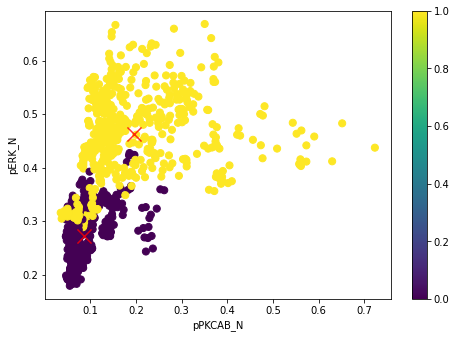

for i =  1 , j =  3


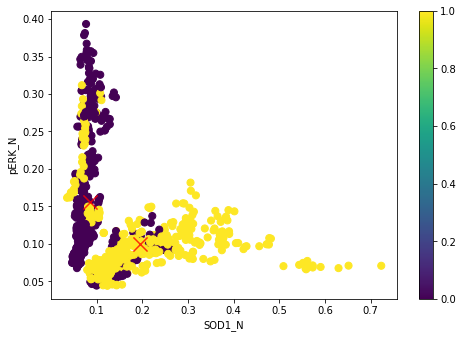

for i =  1 , j =  4


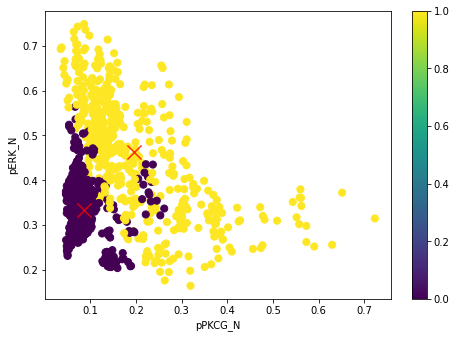

for i =  2 , j =  3


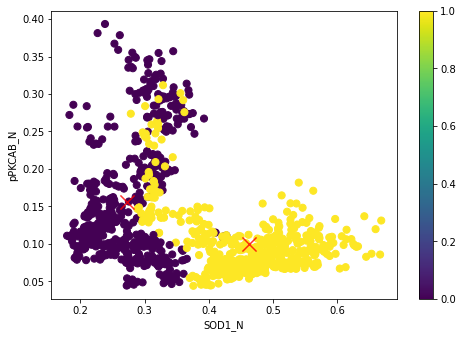

for i =  2 , j =  4


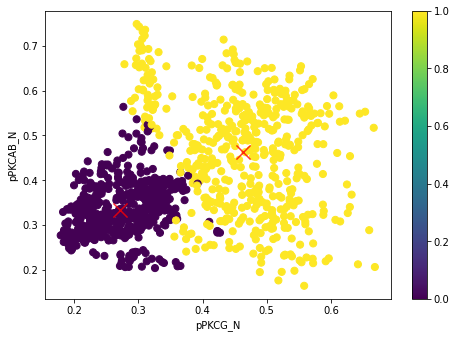

for i =  3 , j =  4


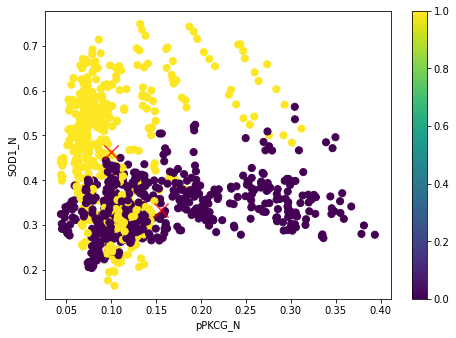

In [74]:
def plotAll(x_scaled, C):
  for i in range(len(x_scaled[1,])):
    for j in range(i+1, len(x_scaled[1,])):
      fig = plt.figure().add_axes([0,0,1,1])
      print ("for i = ",i,", j = ",j)
      output = plt.scatter(x_scaled[:,i], x_scaled[:,j], s = 50, c = C, marker = "o", alpha = 1,)
      centers = kmeans.cluster_centers_
      plt.scatter(centers[:,i], centers[:,j], c='red', s=200, alpha=0.8 , marker="x");
      # plt.title("Hasil Klustering K-Means")
      plt.colorbar(output)
      plt.xlabel(normalized_X.columns[j])
      plt.ylabel(normalized_X.columns[i])
      plt.show()

plotAll(x_array, kX['Kluster'])

<h2>4. Klasifikasi</h2>

Kita harus membagi data menjadi dua yaitu data training dan data testing sebelum melakukan klasifikasi. 
Saya akan membagi masing-masing 80% dan 20%. Untuk melakukan itu, kita bisa menggunakan fungsi train_test_split dari library sklearn.model_selection.

In [0]:
from sklearn.model_selection import train_test_split

X_prot = df.drop(['Genotype','Treatment','Behavior','class'], axis=1)

Kemudian kita buat variabel baru yang berisi data atribut 77 protein. Variabel tersebut saya beri nama X_77. 

In [0]:
X_77 = df.drop(['Genotype','Treatment','Behavior','class'], axis=1)

Karena kita mengambil data dari variabel df dimana data tersebut belum dinormalisasi, maka kita lakukan kembali normalisasi.

In [0]:
columns = X_77.columns
X_77 = normalize(X_77)
X_77 = pd.DataFrame(X_77, columns=columns)

Kemudian membagi data menjadi data training dan data testing dengan memanggil fungsi train_test_split, lalu atur parameter test_size menjadi 0.2.

In [0]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_prot, y, test_size = 0.20, random_state = 123)

Kita pastikan bahwa jumlah atribut nya sebanyak 77 dengan menggunakan keyword shape

In [79]:
X_Train.shape

(864, 77)

<h3>Regresi Logistik</h3>

In [80]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
hs = LR.fit(X_Train, Y_Train)

Y_pred = hs.predict(X_Test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [81]:
accuracy = round(hs.score(X_Test,Y_Test), 4)
print("Accuracy: %.2f %%"%(accuracy*100))

Accuracy: 87.96 %


<h3>SVM</h3>

In [0]:
from sklearn import svm

SVM = svm.SVC(decision_function_shape="ovo")
hs = SVM.fit(X_Train, Y_Train)

Y_pred = hs.predict(X_Test)

In [83]:
accuracy = round(hs.score(X_Test,Y_Test), 4)
print("Accuracy: %.2f %%"%(accuracy*100))

Accuracy: 69.91 %


<h3>Neural Network</h3>

In [84]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(150, 10), random_state=1)
hs = NN.fit(X_Train, Y_Train)

Y_pred = NN.predict(X_Test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [85]:
accuracy = round(hs.score(X_Test,Y_Test), 4)
print("Accuracy: %.2f %%"%(accuracy*100))

Accuracy: 81.48 %


In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_Train, Y_Train)

accuracy = round(hs.score(X_Test,Y_Test), 4)
print("Accuracy: %.2f %%"%(accuracy*100))

Accuracy: 81.48 %


In [87]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(abs(X_prot),y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ["Proteins","Scores"]

featureScores.nlargest(5,"Scores")

,Proteins,Scores
7,pCAMKII_N,167.355452
32,SOD1_N,102.482845
10,pERK_N,84.226671
17,pPKCAB_N,63.175296
46,pPKCG_N,52.751784
